# Mathematical Underpinnings - Lab 4

In [2]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
from sklearn.metrics import mutual_info_score
import seaborn as sns
import pandas as pd

## Task 1

### a)

#### bp 1)

In [2]:
def make_data(p):
    data = np.random.multivariate_normal(np.array([0.,0.]), np.array([[1., p], [p, 1.]]), size=1000)
    return data
x = make_data(0.0)
x

array([[-0.5324765 , -0.95775121],
       [-0.18062312, -0.86007426],
       [-0.53940476,  0.26812945],
       ...,
       [ 0.92258199, -1.12961115],
       [-1.72185758,  0.1100559 ],
       [ 0.85122929,  1.04569615]])

In [3]:
# a heatmap
# you may use pcolormesh function and draw a heatmap for a sample
# or draw a heatmap for a teoretic density function

# I give you an answer to that task, because it may take too much time to do it during labs. 

In [4]:
def plot_xyz(data_2d, nbins=300):
    x = data_2d[:,0]
    y = data_2d[:,1]
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    return xi, yi, zi
plot_xyz(make_data(0.))

(array([[-3.37142787, -3.37142787, -3.37142787, ..., -3.37142787,
         -3.37142787, -3.37142787],
        [-3.34989914, -3.34989914, -3.34989914, ..., -3.34989914,
         -3.34989914, -3.34989914],
        [-3.32837041, -3.32837041, -3.32837041, ..., -3.32837041,
         -3.32837041, -3.32837041],
        ...,
        [ 3.02260534,  3.02260534,  3.02260534, ...,  3.02260534,
          3.02260534,  3.02260534],
        [ 3.04413407,  3.04413407,  3.04413407, ...,  3.04413407,
          3.04413407,  3.04413407],
        [ 3.0656628 ,  3.0656628 ,  3.0656628 , ...,  3.0656628 ,
          3.0656628 ,  3.0656628 ]]),
 array([[-3.15577523, -3.13416998, -3.11256474, ...,  3.26098226,
          3.28258751,  3.30419275],
        [-3.15577523, -3.13416998, -3.11256474, ...,  3.26098226,
          3.28258751,  3.30419275],
        [-3.15577523, -3.13416998, -3.11256474, ...,  3.26098226,
          3.28258751,  3.30419275],
        ...,
        [-3.15577523, -3.13416998, -3.11256474, ...,  

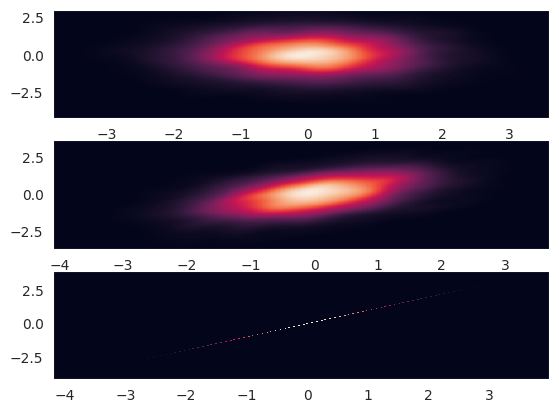

In [13]:
fig, axs = plt.subplots(3)

n = 5000

data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n)
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2)

In [8]:
# pearsonr - Pearson correlation
# mutual_info_classif - MI (I haven't checked if it works correctly, but it seems to; 
#                           for sure sklearn.metrics.mutual_info_score doesn't do what we want)
from sklearn.preprocessing import KBinsDiscretizer
for q in [0., 0.5, 0.75, 0.9, 0.99]:
    data = np.random.multivariate_normal(np.zeros(2), np.array([[1, q], [q, 1]]), 1000)
    disc_data_x = np.digitize(data[:, 0], np.linspace(data[:,0].min(), data[:,0].max(), 10))
    disc_data_y = np.digitize(data[:, 1], np.linspace(data[:,1].min(), data[:,1].max(), 10))
    disc_data = np.column_stack((disc_data_x, disc_data_y))
    print(
        q,
        pearsonr(disc_data[:,0], disc_data[:, 1]),
        mutual_info_score(disc_data[:, 0], disc_data[:, 1])
    )

0.0 PearsonRResult(statistic=-0.052375001935634206, pvalue=0.0978621017990971) 0.03462955247405634
0.5 PearsonRResult(statistic=0.46126415776554297, pvalue=7.814846264617594e-54) 0.14504952215242353
0.75 PearsonRResult(statistic=0.6917421803950881, pvalue=2.942668961314096e-143) 0.3494379565146042
0.9 PearsonRResult(statistic=0.8769371774163018, pvalue=7.654e-320) 0.7473867225067149
0.99 PearsonRResult(statistic=0.9615022459996776, pvalue=0.0) 1.2475668529333324


#### bp 3)

In [10]:
results = []
for q in np.linspace(0, 1, 10):
    for i in range(100):
        data = np.random.multivariate_normal(np.zeros(2), np.array([[1, q], [q, 1]]), 1000)
        disc_data_x = np.digitize(data[:, 0], np.linspace(data[:,0].min(), data[:,0].max(), 10))
        disc_data_y = np.digitize(data[:, 1], np.linspace(data[:,1].min(), data[:,1].max(), 10))
        disc_data = np.column_stack((disc_data_x, disc_data_y))
        results.append({
            "q": q,
            "i": i,
            "pearson": pearsonr(disc_data[:,0], disc_data[:, 1]),
        "mi": mutual_info_score(disc_data[:, 0], disc_data[:, 1])
        })
res = pd.DataFrame(results)
res["pearson"] = res["pearson"].apply(lambda x: x[0])
res["mi"] = res["mi"]


Text(0.5, 1.0, 'pearson correlation')

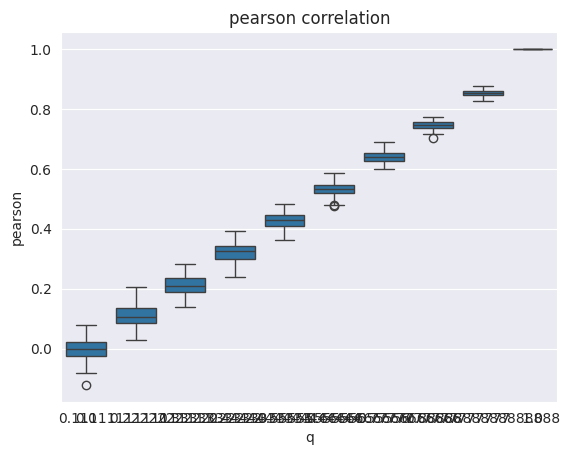

In [11]:
sns.boxplot(res, x="q", y="pearson")
plt.title("pearson correlation")


Text(0.5, 1.0, 'Mutual Information')

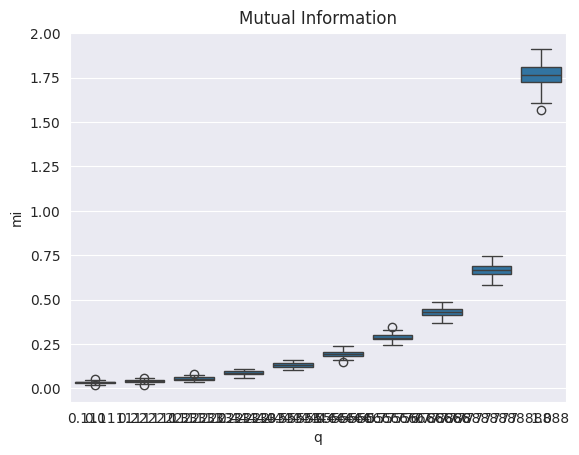

In [12]:
sns.boxplot(res, x="q", y="mi")
plt.title("Mutual Information")

#### bp 4)

A hint: note that mutual information between two correlated normal distributions i.e. when $(X, Y)\sim \mathcal{N}((0,0)', \Sigma)$ and
$$\Sigma = \begin{pmatrix}
        \sigma_x^2 & \rho \\ \rho & \sigma_y^2
    \end{pmatrix}$$
equals
$$I(X,Y) = \frac{1}{2}\log \left(\frac{\sigma_x^2\sigma_y^2}{\sigma_x^2\sigma_y^2 - \rho^2}\right).$$

/tmp/ipykernel_637938/3323184514.py:2: RuntimeWarning: divide by zero encountered in log
  p["pear"] = p["q"].apply(lambda x: -np.log(1-x**2)/2)


<Axes: xlabel='pear', ylabel='mi'>

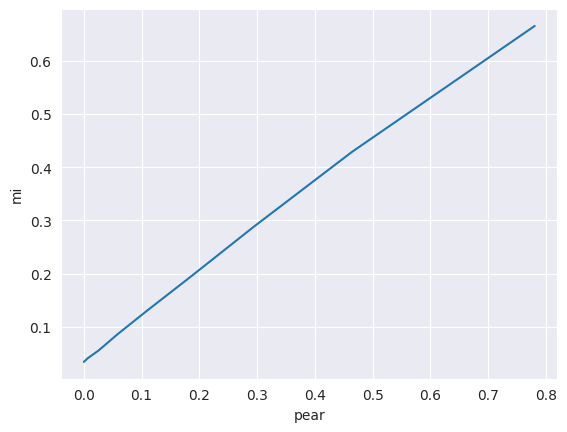

In [18]:
p = res.groupby("q").mean().reset_index().loc[:, ["pearson", "mi", "q"]]
p["pear"] = p["q"].apply(lambda x: -np.log(1-x**2)/2)
sns.lineplot(p, x="pear", y="mi")

In [16]:
res

,q,i,pearson,mi
0,0.0,0,-0.024746,0.035844
1,0.0,1,-0.013075,0.030613
2,0.0,2,0.005490,0.044483
3,0.0,3,-0.035493,0.029781
4,0.0,4,-0.062998,0.037736
...,...,...,...,...
995,1.0,95,1.000000,1.766984
996,1.0,96,1.000000,1.806259
997,1.0,97,1.000000,1.676233
998,1.0,98,1.000000,1.775524


<Axes: xlabel='pear', ylabel='mi'>

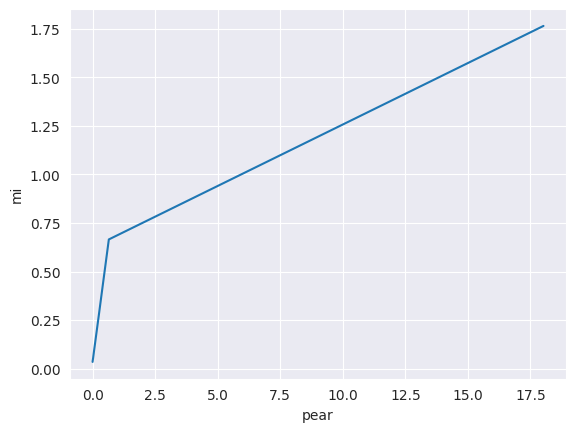

In [19]:
p = res.groupby("q").mean().loc[:, ["pearson", "mi"]]
p["pear"] = p["pearson"].apply(lambda x: -np.log(1-x**2)/2)
sns.lineplot(p, x="pear", y="mi")

no idea where this bend comes from ;-;

### b)

#### bp 1)

In [ ]:
# again: this is too time consuming so here is an answer

In [ ]:
fig, axs = plt.subplots(3)

n = 1000
x = np.random.normal(0, 1, n)

data_2d = np.array([x, x**2 + np.random.normal(0, 0, n)]).T
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 0.5, n)]).T
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 2, n)]).T
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2) and 3)

In [23]:

results = []
for sigma in np.linspace(0, 5, 100):
    for i in range(100):
        x = np.random.standard_normal(n)
        y = x ** 2 + np.random.normal(0, sigma, n)
        disc_data_x = np.digitize(x, np.linspace(x.min(), x.max(), 10))
        disc_data_y = np.digitize(y, np.linspace(y.min(), y.max(), 10))
        disc_data = np.column_stack((disc_data_x, disc_data_y))
        results.append({
            "sigma": sigma,
            "i": i,
            "pearson": pearsonr(disc_data[:,0], disc_data[:, 1]),
        "mi": mutual_info_score(disc_data[:, 0], disc_data[:, 1])
        })
res = pd.DataFrame(results)
res["pearson"] = res["pearson"].apply(lambda x: x[0])
res["mi"] = res["mi"]

In [24]:
q = res.groupby("sigma").mean().reset_index()

<Axes: xlabel='sigma', ylabel='pearson'>

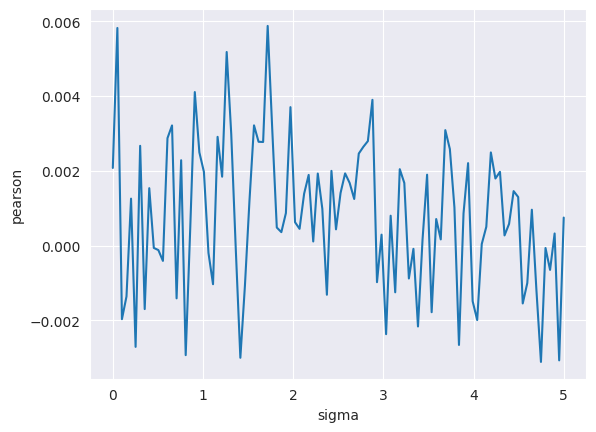

In [25]:
sns.lineplot(q, x="sigma", y="pearson")

<Axes: xlabel='sigma', ylabel='mi'>

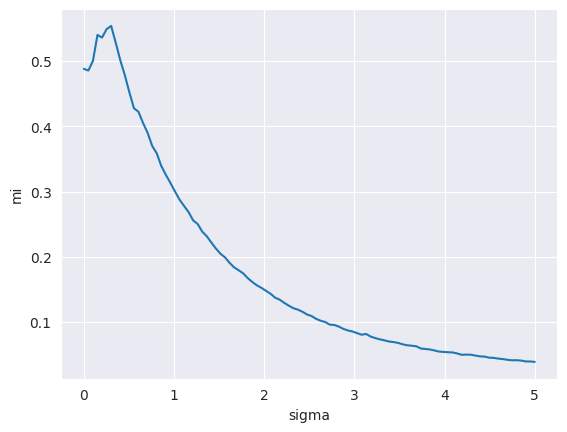

In [26]:
sns.lineplot(q, x="sigma", y="mi")

## Task 2

### a)

In [12]:

def asymptotic_indep_test(x, y, stats):
    assert stats in ["mi", "chi2"]
    disc_x = np.digitize(x, np.linspace(x.min(), x.max(), 10))
    disc_y = np.digitize(y, np.linspace(y.min(), y.max(), 10))
    df = (len(np.unique(disc_x))-1) * (len(np.unique(disc_y))-1)
    table  = np.histogram2d(disc_x, disc_y, bins = 10)[0]
    if stats == "mi":
        test_stat = 2 * len(x) * mutual_info_score(disc_x, disc_y)
    else:
        test_stat = chi2_contingency(table)[0]
    return test_stat, chi2.sf(test_stat, df)

data = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.], [0., 1]]), 1000)
x = data[:, 0]
y = data[:, 1]
asymptotic_indep_test(x, y, "chi2")

(71.55726751074612, 0.7642126647480693)

In [13]:
asymptotic_indep_test(x, y, "mi")

(77.21890952230721, 0.5983999833846972)

### b)

In [28]:
def permutation_indep_test(x, y, b):
    disc_x = np.digitize(x, np.linspace(x.min(), x.max(), 10))
    disc_y = np.digitize(y, np.linspace(y.min(), y.max(), 10))
    test_stat = mutual_info_score(disc_x, disc_y)
    ind_sum = 1
    for _ in range(b):
        perm_disc_x = np.random.permutation(disc_x)
        ind_sum += mutual_info_score(perm_disc_x, disc_y) >= test_stat
    
    return test_stat, ind_sum/(b+1)
permutation_indep_test(x, y, 10)

(0.03860945476115361, 0.18181818181818182)

### c)

**Independent r.v.**

A hint: two discretized independent normal random variables (or any two independent discrete r.v.)

In [32]:
# independent r.v. - we expect that our tests don't reject the null hypothesis
data = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), 1000)

print(asymptotic_indep_test(data[:, 0], data[:, 1], "mi"))
print(asymptotic_indep_test(data[:, 0], data[:, 1], "chi2"))
print(permutation_indep_test(data[:, 0], data[:, 1], 100))


(69.43149560297826, 0.8167701072245235)
(74.61763250885949, 0.6781373458204626)
(0.03471574780148913, 0.4752475247524752)


**Dependent r.v.**

A hint: two discretized dependent normal random variables (or two categorical wuch that we enforce $X=Y$ for a subset of observations)

In [31]:
# independent r.v. - ideally we will reject the null hypothesis
data = np.random.multivariate_normal(np.zeros(2), np.array([[1, .5], [.5, 1]]), 1000)

print(asymptotic_indep_test(data[:, 0], data[:, 1], "mi"))
print(asymptotic_indep_test(data[:, 0], data[:, 1], "chi2"))
print(permutation_indep_test(data[:, 0], data[:, 1], 100))

(321.3491633436346, 2.3279029414721264e-30)
(406.0462153078697, 9.126569826802611e-45)
(0.1606745816718173, 0.009900990099009901)
